<a href="https://colab.research.google.com/github/rizabukhari/Agentic-AI-Pathway/blob/main/Common_Prompt_Patterns_using_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Common Prompt Patterns using LangChain** (Persona Pattern, Question Refinement Pattern, Cognitive Verifier Pattern, Audience Pattern)

### **What is a Prompt?**

A **prompt** in the context of AI and Natural Language Processing (NLP) is an input query or instruction given to a language model or AI agent. This prompt guides the model in generating a response based on the context, details, or instructions provided. Prompts are essential for interacting with AI models and determining the output quality and relevance. In the case of language models like GPT, a prompt can be a question, statement, or even a series of instructions that lead to a response that fits the user's needs.

### **What are Common Prompt Patterns?**

Common prompt patterns refer to structured templates or formats used to interact with language models. These patterns help refine the way prompts are given, ensuring that the model produces the most relevant and accurate responses. By designing effective prompt patterns, users can control the type, style, and detail of the responses generated by the AI model.

Below are some commonly used prompt patterns:
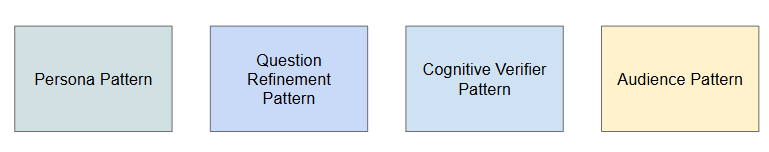

## **Lab Execution**👇

#### **Prerequisites**
You will need an OpenAI API key to complete this lab. If you donot have one yet, please create it by following the guide Prerequisite Lab - [Creating API Keys](https://www.skool.com/k21academy/classroom/0a7dc03d?md=35ab1858bac04486b66a32547d6da30f) — specifically, the section Creating OpenAI API Keys.

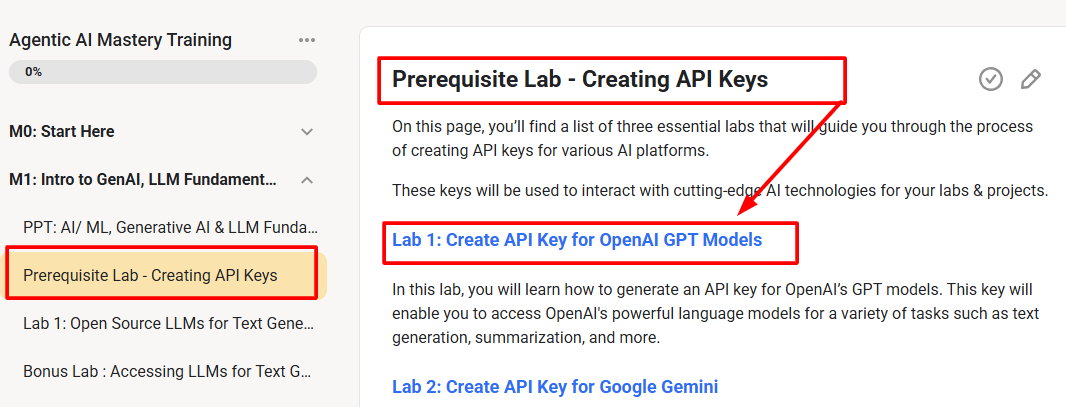


-----

### 1\. Persona Pattern 🎭

The **Persona Pattern** involves instructing the LLM to adopt a specific identity, role, or character. This primes the model to answer from a particular point of view, with a certain tone, and with specialized knowledge, leading to more focused and higher-quality responses.

#### Concept

You give the model a role, like "You are an expert astrophysicist" or "You are a witty, sarcastic travel guide." All subsequent answers will be filtered through this persona.

#### LangChain Implementation

We use the `system` message in a `ChatPromptTemplate` to set the persona. This message tells the model how it should behave throughout the conversation.

a. **Installing LangChain and Required Packages**

In order to work with LangChain, we need to install the core LangChain package, LangChain OpenAI integration, and LangChain Community version. Below is the installation command along with an explanation for each package.

In [2]:
# Install LangChain package (core functionality)
!pip install langchain==0.3.27  # This installs the core LangChain library that provides essential tools for building language model-based applications.

# Install LangChain OpenAI integration (for OpenAI API usage)
!pip install langchain-openai==0.3.8  # This package allows the use of OpenAI models (e.g., GPT-3, GPT-4) within LangChain, enabling smooth integration with OpenAI's API.

# Install LangChain Community edition (for additional features)
!pip install langchain-community==0.3.27  # This version includes community-driven contributions and additional features that expand the capabilities of LangChain.

b. **Setting Up the OpenAI API Key Securely**

The code below demonstrates how to securely input and set up the OpenAI API key for use within your environment. This ensures that your API key is kept private and not hard-coded into the script.

***Note:*** Please paste your OpenAI API key in the dialog box below and press the Enter button. If you haven't created an API key yet, refer to the "Prerequisites" section for instructions on how to generate one. Remember to keep your API key secure and avoid exposing it in public code repositories.

In [ ]:
# Import the getpass module for securely entering the OpenAI API key
from getpass import getpass

# Prompt the user to enter the OpenAI API key without displaying it on the screen
OPENAI_KEY = getpass('Enter Open AI API Key: ')  # User input will be masked for privacy

In [ ]:
# After entering the key, we store it as an environment variable for use later in the script
import os
os.environ['OPENAI_API_KEY'] = OPENAI_KEY  # Set the environment variable to the entered API key

c. **Creating a Chat-Based AI System Using LangChain**

This code demonstrates how to set up a language model, define a prompt with a persona, create a chain of operations, and invoke the chain to answer a question. Let's break it down:

In [ ]:
# 1. Set up the model
# Initialize the ChatOpenAI model with the specified settings.
# We are using gpt-3.5-turbo for this task with a temperature setting of 0.3 for controlled randomness in responses.
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.3)

# 2. Define the prompt with a Persona
# The 'system' message sets a persona for the AI model. This persona defines the behavior and style of the model’s responses.
# Here, we are instructing the model to act as a world-class cybersecurity expert who explains complex topics simply, using analogies.
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world-class cybersecurity expert with a knack for explaining complex topics in simple terms. You are direct and use analogies."),
    ("human", "{question}")
])

# 3. Create the chain
# The chain connects the prompt, the model, and the output parser into a flow that can process and generate responses.
chain = prompt | llm | StrOutputParser()

In [ ]:
# 4. Invoke the chain with a question
# Here, we provide a question to the system, asking about a 'zero-day exploit'.
# The system processes the input using the defined persona and generates a relevant response.
question = "What is a 'zero-day exploit' and why is it so dangerous?"
response = chain.invoke({"question": question})

# Print the response
print(response)

Think of a zero-day exploit as a secret backdoor in a house that only the burglar knows about. In the world of cybersecurity, a zero-day exploit is a vulnerability in software that is unknown to the software developer and therefore has no fix or patch available. This makes it extremely dangerous because hackers can exploit this vulnerability to launch attacks without the software developer being aware of it.

Imagine if a thief knew about a hidden entrance in your house that you didn't even know existed. They could break in and steal your valuables without you ever realizing how they got in. Similarly, hackers can use zero-day exploits to infiltrate systems, steal sensitive information, or cause damage without the software developer or security teams being able to defend against it.

Because zero-day exploits are not yet known to the software developer, there is no immediate fix available, leaving systems vulnerable until a patch is developed. This makes zero-day exploits highly sought

#### Explanation

In this code, the `("system", ...)` message assigns the **persona** of a cybersecurity expert. When the chain is invoked, the model doesn't just give a generic definition; it adopts the specified character. The response will likely use an analogy (e.g., "Imagine a security company builds an indestructible lock, but a thief finds a secret, un-patched flaw on the very day it's released... that's a zero-day exploit") because the persona instructed it to.

----

### 2\. Question Refinement Pattern 🧐

The **Question Refinement Pattern** is used when a user's initial query is too vague or broad. Instead of trying to answer the ambiguous question directly, the model first helps the user formulate a better, more specific question.

#### Concept

The LLM acts as an expert assistant, analyzing the user's question and suggesting clearer, more effective versions of it before providing a final answer. This is a multi-step process.

#### LangChain Implementation

This is a perfect use case for chaining multiple components together using LCEL. We'll create one chain to refine the question and a second chain to answer the *refined* question.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# 1. Set up the model
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# 2. Chain 1: Refine the user's question
# The first chain helps refine the vague or broad question into something more specific.
refine_prompt = ChatPromptTemplate.from_template("""
You are an expert question creator. Given the user's question, refine it to be more specific and answerable.
Only output the refined question.

Original Question: {question}
Refined Question:""")
refiner_chain = refine_prompt | llm | StrOutputParser()

# 3. Chain 2: Answer the refined question
# The second chain answers the refined question generated by the first chain.
answer_prompt = ChatPromptTemplate.from_template("""
You are an expert on all topics. Answer the following question thoroughly.

Question: {refined_question}
Answer:""")
answer_chain = answer_prompt | llm | StrOutputParser()

# 4. Combine the chains
# The output of the refine_chain is passed as 'refined_question' to the answer_chain.
full_chain = {"refined_question": refiner_chain} | answer_chain

# 5. Invoke the full chain with a vague question
# Here, we invoke the full chain with a vague question ("Tell me about cars").
vague_question = "Tell me about cars."
response = full_chain.invoke({"question": vague_question})

# Print the response
print(response)

As of 2021, there are several electric car models on the market that offer a range of features and specifications. Some of the key features and specifications of the latest electric car models include:

1. Range: One of the most important factors to consider when purchasing an electric car is the range it can travel on a single charge. Many of the latest electric car models offer ranges of over 200 miles, with some models even exceeding 300 miles on a single charge.

2. Charging time: Another important factor to consider is the charging time of the electric car. Many of the latest models come equipped with fast-charging capabilities, allowing them to charge up to 80% in as little as 30 minutes at a DC fast-charging station.

3. Performance: Electric cars are known for their quick acceleration and smooth driving experience. Many of the latest models offer impressive performance specs, with 0-60 mph times rivaling those of traditional gas-powered vehicles.

4. Technology: Electric cars a

#### Explanation

1.  The user's vague query ("Tell me about cars.") is first sent to the `refiner_chain`. This chain's LLM, guided by its prompt, might output a better question like, "What are the key differences in engine technology between modern electric vehicles and traditional internal combustion engine cars?"
2.  LCEL then pipes this refined question as input to the `answer_chain`.
3.  The final output is a detailed answer to the *specific, refined question*, not the original vague one. This results in a much more useful response.

-----


### 3\. Cognitive Verifier Pattern 🎯

The **Cognitive Verifier Pattern** forces the model to "show its work." Instead of just outputting an answer, it first generates the underlying reasoning, facts, or steps it used to arrive at the answer. This reduces the chances of hallucination and allows for verification.

#### Concept

The process is split into two parts:

1.  **Generation:** The model answers the question but also provides its step-by-step reasoning.
2.  **Verification/Extraction:** The model (or a second, simpler model/prompt) extracts the final answer from the detailed output.

#### LangChain Implementation

We create two prompts and chain them. The first generates a detailed thought process, and the second extracts the clean, final answer.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# 1. Set up the model
llm = ChatOpenAI(model="gpt-4", temperature=0)

# 2. Prompt 1: Generate reasoning and the answer
# This prompt generates both reasoning and a final answer.
reasoning_prompt = ChatPromptTemplate.from_template("""
You are a meticulous problem solver. Given a question, provide a step-by-step reasoning process and then state the final answer.

Question: {question}

Reasoning:
[Provide your step-by-step thinking here]

Final Answer:
[State the final, concise answer here]
""")

# 3. Prompt 2: Extract only the final answer
# This prompt extracts the final answer from the reasoning output.
extractor_prompt = ChatPromptTemplate.from_template("""
Extract the 'Final Answer' from the following text.

{reasoning_output}
""")

# 4. Create the full chain
# The first part generates the detailed output, the second part extracts the answer.
cognitive_verifier_chain = (
    reasoning_prompt
    | llm
    | StrOutputParser()
)

full_chain = (
    {"reasoning_output": cognitive_verifier_chain}
    | extractor_prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# 5. Invoke with a multi-step question
question = "If a train leaves Station A at 8:00 AM traveling at 60 km/h, and a second train leaves Station B at 9:00 AM traveling at 90 km/h on the same track towards Station A, when will they meet if the stations are 480 km apart?"
final_answer = full_chain.invoke({"question": question})

# Print the final answer
print("--- Final Answer ---")
print(final_answer)

# You can also run just the first part to see the reasoning
reasoning = cognitive_verifier_chain.invoke({"question": question})
print("\n--- Full Reasoning Output ---")
print(reasoning)

--- Final Answer ---
The trains will meet at 11:48 AM.

--- Full Reasoning Output ---
Reasoning:

Step 1: First, we need to determine how far the first train travels before the second train starts. Since the first train leaves an hour earlier and travels at 60 km/h, it will have traveled 60 km by the time the second train starts.

Step 2: This means that when the second train starts, the two trains are 480 km - 60 km = 420 km apart.

Step 3: Now, we need to determine how long it will take for the two trains to meet. Since they are traveling towards each other, we add their speeds together. So, they are closing the distance between them at a rate of 60 km/h + 90 km/h = 150 km/h.

Step 4: To find out how long it will take for them to meet, we divide the distance they need to cover by their combined speed. So, 420 km ÷ 150 km/h = 2.8 hours.

Step 5: Since the second train starts at 9:00 AM, they will meet at 9:00 AM + 2.8 hours = 11:48 AM.

Final Answer:

The two trains will meet at 11:48

#### Explanation

The `cognitive_verifier_chain` forces the model to first outline its entire logical process (calculating the head start, relative speed, etc.). The `full_chain` then uses an `extractor_prompt` to parse this detailed output and present only the clean, final answer (e.g., "The trains will meet at 11:48 AM.") to the user, while the full reasoning remains available for verification.

-----

### 4\. Audience Pattern 👨‍👩‍👧‍👦

The **Audience Pattern** involves explicitly telling the model who the intended audience is. This allows the model to tailor the complexity, tone, and vocabulary of its response to be appropriate for that specific audience.

#### Concept

You provide context about the end-user, such as "explain this to a 5-year-old," "write this for a team of software engineers," or "compose this for a skeptical board of directors."

#### LangChain Implementation

This is easily done by adding an `{audience}` variable to the prompt template.

In [ ]:
# Import necessary modules from LangChain
from langchain_openai import ChatOpenAI  # This imports the ChatOpenAI model, which we will use to interact with OpenAI's GPT model.
from langchain_core.prompts import ChatPromptTemplate  # This imports the ChatPromptTemplate class to define custom prompts.
from langchain_core.output_parsers import StrOutputParser  # This allows us to parse the output of the model.

# Set up the language model
llm = ChatOpenAI(model="gpt-4")  # This initializes the GPT-4 model, setting up the language model for usage.

# Define the prompt with an Audience placeholder
# The {audience} is a placeholder that will allow us to dynamically change the target audience for the explanation.
prompt = ChatPromptTemplate.from_template(
    "Explain the concept of '{concept}' to {audience}."  # The prompt instructs the model to explain a concept tailored to a specific audience.
)

# Create the chain
chain = prompt | llm | StrOutputParser()  # This chain combines the prompt, the language model, and the output parser.

# Invoke the chain for different audiences
concept = "photosynthesis"  # Here, we're using the concept of "photosynthesis" to explain to different audiences.

# Audience 1: A 5-year-old child
audience_child = "a 5-year-old child"  # Defining the first audience as a child (for simplified explanation).
response_child = chain.invoke({"concept": concept, "audience": audience_child})  # The model will generate a response suitable for a child.

# Print the response for the 5-year-old audience
print(f"--- For a {audience_child} ---")  # Print the heading to indicate the audience.
print(response_child)  # Display the model's explanation tailored for a 5-year-old child.

--- For a a 5-year-old child ---
Photosynthesis is how plants eat! But instead of using their mouths, plants use sunlight, water from the ground and air to make their own food. They use something green in their leaves called chlorophyll to capture sunlight. Once they catch the sunlight, they mix it with water and air to create food and give out fresh air for us to breathe. It's kind of like cooking but in a plant way!


In [ ]:
# Audience 2: A biology undergraduate student
audience_student = "a biology undergraduate student"  # Defining the second audience as a biology undergraduate student.
response_student = chain.invoke({"concept": concept, "audience": audience_student})  # Invoking the chain with a more technical audience (biology student).

# Print the response for the biology undergraduate audience
print(f"\n--- For a {audience_student} ---")  # Print the heading for the audience type.
print(response_student)  # Display the explanation of photosynthesis tailored for a biology undergraduate student.


--- For a a biology undergraduate student ---
Photosynthesis is a process used by plants, algae, and certain types of bacteria to harness energy from sunlight to convert water and carbon dioxide into glucose, which is a form of sugar that serves as a source of chemical energy. These organisms also produce a by-product of oxygen during photosynthesis.

The process involves two stages. The initial phase, known as the light-dependent reactions or light reactions, occurs in the thylakoid membrane of the chloroplasts, where sunlight is converted into chemical energy, specifically in the form of ATP (Adenosine triphosphate) and NADPH (Nicotinamide adenine dinucleotide phosphate).

The second phase, known as the light-independent reactions or the Calvin cycle, happens in the stroma of the chloroplasts. Here, the ATP and NADPH produced in the light-dependent reactions are used to make glucose from molecules of CO2 in a cycle of chemical reactions.

Photosynthesis is fundamental to life on Ear

#### Explanation

By simply changing the `audience` variable, the chain produces dramatically different outputs for the same concept. For the child, it will use simple analogies like "plants eating sunlight to make their food." For the student, it will use precise scientific terms like chlorophyll, chloroplasts, ATP, and NADPH. This makes the pattern incredibly powerful for creating context-aware content.

-----

### Can this be done without LangChain? What's the benefit?

Yes, absolutely. **All these patterns are fundamentally prompt engineering techniques.** You could implement them by manually formatting strings and making direct calls to the OpenAI API (or any other model provider).

In [ ]:
# NON-LANGCHAIN EXAMPLE (Persona Pattern)
import openai
client = openai.OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "system", "content": "You are a world-class cybersecurity expert..."},
    {"role": "user", "content": "What is a 'zero-day exploit'?"}
  ]
)
print(response.choices[0].message.content)

A zero-day exploit is a type of cyberattack that takes advantage of a security vulnerability in software or hardware that is unknown to the party responsible for fixing the flaw, typically the software vendor or hardware manufacturer. The term "zero-day" refers to the fact that the developers have had zero days to fix the issue since they were unaware of it. It is considered particularly dangerous because the vulnerability can be exploited by attackers before a patch or mitigation becomes available, leaving systems defenseless against this specific type of attack.

Zero-day exploits are often used in targeted attacks, such as corporate espionage or government surveillance, and can be sold on the black market for significant sums of money due to their potency and the advantage they provide to attackers. Once the vulnerability becomes known to the software vendor, they will typically rush to develop and distribute a patch to protect users, but until then, systems remain vulnerable.


So, why use LangChain? The benefits become enormous as your application grows in complexity.

1.  **Standardization and Reusability:** LangChain's `PromptTemplate` objects turn your prompts into reusable, standardized components. You can save them, share them, and version them easily.
2.  **Composability (LCEL):** This is LangChain's superpower. As shown in the *Question Refinement* and *Cognitive Verifier* patterns, you can pipe (`|`) components together to create complex logic with very little code. Doing this with raw API calls would require messy, nested functions and manual state management.
3.  **Model Agnosticism:** Your prompt templates and chains are not tied to OpenAI. You can easily swap `ChatOpenAI` for `ChatGoogleGenerativeAI` or `ChatAnthropic` with minimal code changes, allowing you to experiment with different models.
4.  **Integration Ecosystem:** LangChain provides built-in tools for everything that comes *before* and *after* the prompt: document loaders to get data, text splitters, embedding models, vector stores for RAG, and output parsers to structure the final response.
5.  **Observability and Debugging:** With a tool like **LangSmith**, you can trace the execution of every step in your chain, see the inputs and outputs, and debug complex interactions. This is nearly impossible to do with raw API calls.
6.  **Productionization:** Tools like **LangServe** allow you to take any chain you build and instantly deploy it as a production-ready REST API.

In short, while you *can* implement these patterns without LangChain, **LangChain provides the essential framework, structure, and tools to build, debug, and deploy them as robust, scalable applications.**

## **Summary of Prompt Patterns:**

- **Persona Pattern:** Defines the role or persona of the model to tailor responses according to the desired behavior (e.g., teacher, expert).

- **Question Refinement Pattern:** Helps in refining vague or broad questions into more specific and answerable queries before providing an answer.

- **Cognitive Verifier Pattern:** Encourages the model to show its reasoning process before answering, improving transparency and reducing hallucination.

- **Audience Pattern:** Tailors responses based on the audience’s understanding level, allowing the model to adjust the tone, complexity, and vocabulary accordingly.

These patterns, when implemented using LangChain, enable developers to create highly customizable and context-sensitive interactions with AI models.